In [13]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd

# Sklearn Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate

# Custom Module's
from acquire import get_telco_data, get_data_dictionary, get_target
from prepare import prep_telco_data
import explore


import warnings
warnings.filterwarnings("ignore")

<p style="font-family:courier; font-size:200%; text-align:center"> <b>Project Planning<b> </p>

<p style="font-family:courier; font-size:150%;">
<b>Project and Goals</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The project and goal is to find and document drivers for customer churn at Telco and to construct a machine learning classification model that accurately predicts customer churn.<br><br></p>

<p style="font-family:courier; font-size:150%;">
<b>The Plan</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Setup my environment, create a new repository, update the .gitignore, create a README.md with the data dictionary, project and business goals, and come up with initial hypotheses.<br><br>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Acquire the data, create a python function and SQL script to select all the features and observations from the codeup database.<br><br>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Clean the data, drop any useless features, remove duplicate observations, double check data-types, find any null values, decide what do with null values, and encode the features.<br><br>
<b>Split the Data</b><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Split the cleaned data into three data sets named train, validate, and test.<br><br>
<b>Explore the data</b><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Look through the graphs and evaluate each feature to see if they play a part in churn.  Exploration will also include two hypotheses, setting of alpha, statistical tests, rejecting or failing to reject the null hypothesis, and documentation of the findings and takeaways.<br><br>
<b>Create Models</b><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Create three machine learning models plus a baseline model.  Will be using a DecisionTreeClassifier, RandomForestClassifier, and KNeighborsClassifier.  Evaluate models on train and validate datasets.  Pick the model with highest validate accuracy to run on my final test data.<br><br>
<b>Create CSV</b><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Create csv file with the measurement id, the probability of the target values, and the model's prediction for each observation in my test dataset.<br><br>
<b>Wrap it up</b><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I will document conclusions, recommendations, and takeaways in the final report notebook.<br><br><br>For a more detailed and in depth steps, refer to the README.MD</p>



<p style="font-family:courier; font-size:200%; text-align:center"> <b>Executive Summary - Conclusions & Next Steps<b> </p>

    I found that my models x, y, and Z...
    my best model was ..... and it beat/didn't beat my baselien of ...
    The features my model were....
    
    

<p style="font-family:courier; font-size:200%; text-align:center"> <b>Data Acquisition<b> </p>

In [2]:
# read telco data into a DataFrame
df = get_telco_data()

<p style="font-family:courier; font-size:150%; text-align:left"> <b>.info(), .head(), .describe()<b> </p>

In [3]:
df.info()

# Telco has 7043 observations and 27 features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   gender                      7043 non-null   object 
 2   senior_citizen              7043 non-null   int64  
 3   partner                     7043 non-null   object 
 4   dependents                  7043 non-null   object 
 5   tenure                      7043 non-null   int64  
 6   phone_service               7043 non-null   object 
 7   multiple_lines              7043 non-null   object 
 8   internet_service_type_id    7043 non-null   int64  
 9   online_security             7043 non-null   object 
 10  online_backup               7043 non-null   object 
 11  device_protection           7043 non-null   object 
 12  tech_support                7043 non-null   object 
 13  streaming_tv                7043 

In [4]:
df.head(5)

# Showing only 5 observations

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,2,90.45,5957.9,No,3,Two year,1,DSL,2,Mailed check
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,4,45.20,2460.55,No,3,Two year,1,DSL,4,Credit card (automatic)
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,3,45.05,2560.1,No,3,Two year,1,DSL,3,Bank transfer (automatic)
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,4,39.40,825.4,No,3,Two year,1,DSL,4,Credit card (automatic)
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,3,85.15,6316.2,No,3,Two year,1,DSL,3,Bank transfer (automatic)


In [5]:
df.describe().T

# Transposed 

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
contract_type_id.1,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
internet_service_type_id.1,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
payment_type_id.1,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00


<p style="font-family:courier; font-size:150%; text-align:left"> <b>Distributions - "monthly_charges", "tenure"<b> </p>

<AxesSubplot:>

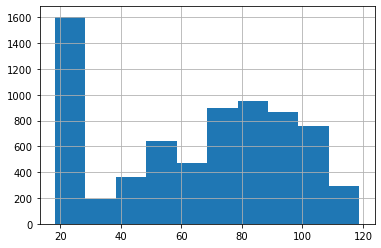

In [6]:
df.monthly_charges.hist()

<AxesSubplot:>

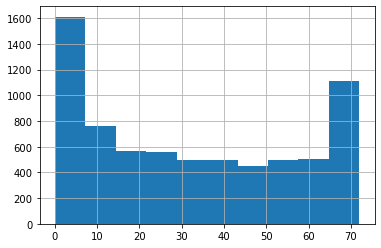

In [7]:
df.tenure.hist()

<p style="font-family:courier; font-size:150%; text-align:left"> <b>Target - "churn"<b> </p>

In [8]:
print(get_target(df).to_markdown())

|             | Target                                             |
|:------------|:---------------------------------------------------|
| Feature     | churn                                              |
| Datatype    | 7043 non-null: object                              |
| Description | Yes or no, whether or not the customer has churned |


In [9]:
print(df.churn.value_counts().to_markdown())

|     |   churn |
|:----|--------:|
| No  |    5174 |
| Yes |    1869 |


<AxesSubplot:>

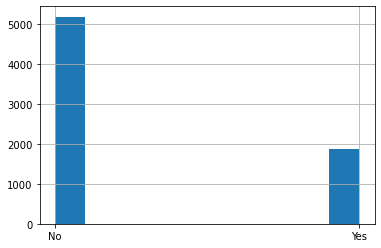

In [10]:
df.churn.hist()

<p style="font-family:courier; font-size:150%; text-align:left"> <b>Data Dictionary<b> </p>

In [11]:
print(get_data_dictionary(df).to_markdown())

| Feature                    | Datatype               | Description                                                           |
|:---------------------------|:-----------------------|:----------------------------------------------------------------------|
| customer_id                | 7043 non-null: object  | Identification number for customer                                    |
| gender                     | 7043 non-null: object  | Customer gender, male or female                                       |
| senior_citizen             | 7043 non-null: int64   | Yes or No, is the customer a senior citizen                           |
| partner                    | 7043 non-null: object  | Yes or No, does the customer customer has a parter                    |
| dependents                 | 7043 non-null: object  | Number of dependents a customer has                                   |
| tenure                     | 7043 non-null: int64   | Number of months a customer has been with the co

<p style="font-family:courier; font-size:150%;">
<b>Data Acquisition Takeaways</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The Telco data has 7043 observations and 27 features.  Monthly charges and Tenure are not normally distributed.  1869 customers have churned.  The feature total charges has a data type of object.<br><br></p>

<p style="font-family:courier; font-size:200%; text-align:center"> <b>Data Preparation<b> </p>

<p style="font-family:courier; font-size:150%;">
<b>Clean</b><br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Missing values, the Telco data had 11 observations missing a value in the feature total_charges.  Since these all of these observations had a tenure of zero, I decided to drop them.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Dropping columns, dropped customer_id because it didn't bring any value. Dropped internet_service_type_id.1,  payment_type_id.1, contract_type_id.1 as they were duplicate features.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Convert data type, 'total_charges' was changed from object to float.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Encode, used pd.get_dummies() to create new encoded features and dropped the non-encoded features</p>

<p style="font-family:courier; font-size:150%;">
<b>Split</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Used sklearn.model_selection to split my cleaned data into three data sets train, validate, and test<br><br></p>

<p style="font-family:courier; font-size:150%;">
<b>Prepare</b><br><br></p>

In [16]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3937, 50)
validate -> (1688, 50)
test -> (1407, 50)


<p style="font-family:courier; font-size:150%;">
<b>Data Preperation Takeaways</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;All features and observations have no null or empty values.  All values have been encoded to numberic values.  test_train_split were stratified on my target feature churn. <br><br></p>

<p style="font-family:courier; font-size:200%; text-align:center"> <b>Data Exploration & Analysis<b> </p>

# Plan -> Acquire -> Prepare -> Explore -> <span style="background-color:#00FF00">Model</span> -> Deliver

# Plan -> Acquire -> Prepare -> Explore -> Model -> <span style="background-color:#00FF00">Deliver</span>

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$H_{0}$ 
<p style="font-family:courier; font-size:150%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There is no difference in the rate of churn for customers who pay with different payment types.<br></p>

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$H_{a}$
<p style="font-family:courier; font-size:150%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Is there a difference in the rate of churn for customers who pay with different payment types? </p>

### Introduce yourself and your project goals at the very beginning of your notebook walkthrough.

### Summarize your findings at the beginning like you would for an Executive Summary. Just because you don't have a slide deck for this presentation, doesn't mean you throw out everything you learned from Storytelling.

### Walk us through the analysis you did to answer our questions and that lead to your findings. Relationships should be visualized and takeaways documented. Please clearly call out the questions and answers you are analyzing as well as offer insights and recommendations based on your findings.

### For example: If you find that month-to-month customers churn more, we won't be surprised, but Telco is not getting rid of that plan. The fact that customers churn is not because they can; it's because they can and they are motivated to do so. We want your insights into why they are motivated to do so. We realize you will not be able to do a full causal experiment, but we would like to see some solid evidence of your conclusions.

### Finish with key takeaways, recommendations, and next steps and be prepared to answer questions from the data science team about your project.

### Remember you have a time limit of 5 minutes for your presentation. Make sure you practice your notebook walkthrough keeping this time limit in mind; it will go by very quickly.